In [1]:
# coding=utf-8
# Copyright 2023 Frank Latos AC8P
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

#
# Much appreciation to the Pymoo project for providing the optimization framework used herein:
#
# pymoo: Multi-objective Optimization in Python
# https://github.com/anyoptimization/pymoo
# https://pymoo.org/index.html
#


# A Class for Representing Yagis and Other Antennas: Part 2, Examples

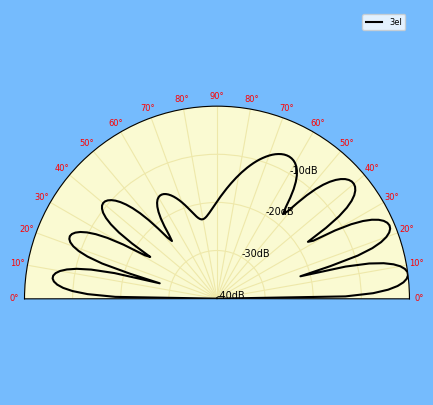

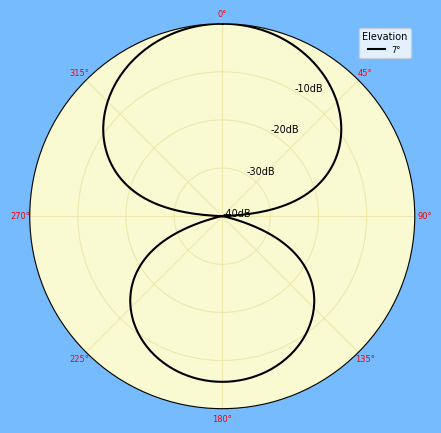

In [29]:

# A simple example: Three-element Yagi
from necutil import in2m, SolidAntenna, SolidObjVisualizer,nec5_sim_stdio3,plot_azimuth,plot_elevation

# Specify three elements, place antenna at z = 20 meters
three_el_yagi = SolidAntenna(properties={'translate':(0,0,20), 'display_mirror':True, 'seg_per_m':5}, n_elem=3)

# Set half-element lengths and element positions
three_el_yagi[0] = {'len':in2m(108.75), 'translate':(-in2m(36),0,0)}        # Reflector
three_el_yagi[1] = {'len':in2m(99.625), 'translate':(0,0,0)}                # Driven
three_el_yagi[2] = {'len':in2m(95.125), 'translate':(in2m(54),0,0)}         # Director



# That's all that's required to specify the antenna design in this case
# Now we can generate the NEC5 geometry cards...
nec_geom = three_el_yagi.get_nec_cards()   

# ...and insert them into a NEC5 template...
nec_template = """CE 3el Yagi
{gw_cards}
GX 100 010
GE 1 0
GD 0 0 0 0 13 0.005 0 0
EX 4 1 1 1 1.0 0.0
FR 0 1 0 0 28.5 0
RP 0 91 360 0000 0 0 1 1
EN
"""
nec_deck = nec_template.format(gw_cards=nec_geom.strip())

# ...and run the simulation
result = nec5_sim_stdio3([nec_deck])
rad_pat = result[0][1][0][0][1]                 # Extract just the radiatuion pattern array
plot_elevation([rad_pat], tags=['3el'])
plot_azimuth(rad_pat, [7])
             

In [30]:
v = SolidObjVisualizer(x=(-10,10), y=(-10,10), z=(0,21))
v.add(three_el_yagi)
v.show()

The 3D visualizer provided here is based on the 3D graph viewer from the Plotly data visualization library.

You can:
* rotate the view (left button)
* zoom (mouse wheel)
* pan (right button)

You'll need to run this notebook locally to see the live viewer in the preceding cell...

![Graph](img/3el_yagi_1.png)